<a href="https://colab.research.google.com/github/amshaheen16/customer-churn-prediction/blob/main/first_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px

#loading data set

In [2]:
# Load the training and testing datasets
train_data = pd.read_csv("/content/customer_churn_dataset-training-master.csv")
test_data = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")

# Display the first few rows of the dataset
print("Training Data Overview:")
print(train_data.head())

print("\nTesting Data Overview:")
print(test_data.head())


Training Data Overview:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4

#EDA

In [3]:
# Display dataset shape
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)


Training Data Shape: (440833, 12)
Testing Data Shape: (64374, 12)


In [4]:
# Check for missing values in both datasets
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())



Missing Values in Training Data:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Missing Values in Testing Data:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [5]:
# Drop rows with missing values in the training data
train_data.dropna(inplace=True)

# Verify that missing values are removed
print("\nMissing Values in Training Data After Cleaning:")
print(train_data.isnull().sum())



Missing Values in Training Data After Cleaning:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [6]:
# Display data types of each column
print("\nData Types in Training Data:")
print(train_data.dtypes)



Data Types in Training Data:
CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


In [7]:
# Convert Churn to integer
train_data["Churn"] = train_data["Churn"].astype(int)

# Drop CustomerID column
train_data.drop(columns=["CustomerID"], inplace=True)
test_data.drop(columns=["CustomerID"], inplace=True)

# Verify changes
print("\nUpdated Data Types in Training Data:")
print(train_data.dtypes)



Updated Data Types in Training Data:
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object


In [8]:
# Display unique values in categorical columns
categorical_columns = ["Gender", "Subscription Type", "Contract Length"]

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(train_data[col].unique())



Unique values in Gender:
['Female' 'Male']

Unique values in Subscription Type:
['Standard' 'Basic' 'Premium']

Unique values in Contract Length:
['Annual' 'Monthly' 'Quarterly']


In [9]:
# Encode categorical variables
train_data["Gender"] = train_data["Gender"].map({"Female": 0, "Male": 1})
test_data["Gender"] = test_data["Gender"].map({"Female": 0, "Male": 1})

train_data["Subscription Type"] = train_data["Subscription Type"].map({"Basic": 0, "Standard": 1, "Premium": 2})
test_data["Subscription Type"] = test_data["Subscription Type"].map({"Basic": 0, "Standard": 1, "Premium": 2})

train_data["Contract Length"] = train_data["Contract Length"].map({"Monthly": 0, "Quarterly": 1, "Annual": 2})
test_data["Contract Length"] = test_data["Contract Length"].map({"Monthly": 0, "Quarterly": 1, "Annual": 2})

# Verify encoding
print("\nFirst 5 rows after encoding:")
print(train_data.head())



First 5 rows after encoding:
    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0       0    39.0             14.0            5.0           18.0   
1  65.0       0    49.0              1.0           10.0            8.0   
2  55.0       0    14.0              4.0            6.0           18.0   
3  58.0       1    38.0             21.0            7.0            7.0   
4  23.0       1    32.0             20.0            5.0            8.0   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  
0                  1                2        932.0              17.0      1  
1                  0                0        557.0               6.0      1  
2                  0                1        185.0               3.0      1  
3                  1                0        396.0              29.0      1  
4                  0                0        617.0              20.0      1  


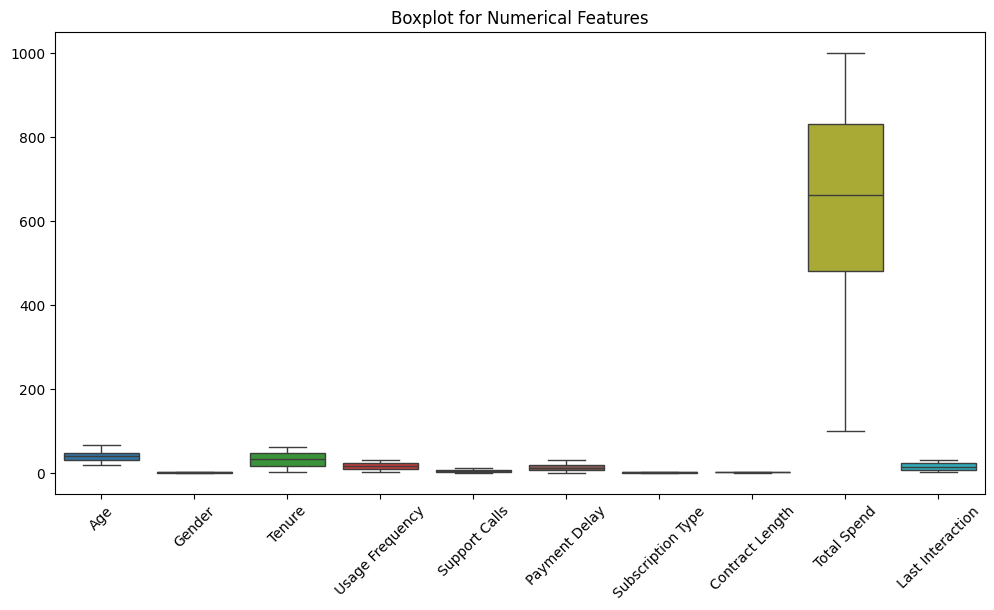

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 6))

# Create boxplot for numerical features
sns.boxplot(data=train_data.drop(columns=["Churn"]))

# Show plot
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Features")
plt.show()


In [11]:
# Define function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for Total Spend
train_data = remove_outliers(train_data, "Total Spend")

# Verify the new shape after outlier removal
print("New Training Data Shape:", train_data.shape)


New Training Data Shape: (440832, 11)


#Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_features = ["Age", "Tenure", "Usage Frequency", "Support Calls", "Payment Delay",
                      "Total Spend", "Last Interaction"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

# Transform the testing data using the same scaler
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Display the first few rows after scaling
print(train_data.head())


        Age  Gender    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0 -0.753326       0  0.448760        -0.210511       0.454549       0.609620   
1  2.059646       0  1.028278        -1.724562       2.083100      -0.601319   
2  1.255940       0 -1.000036        -1.375166       0.780259       0.609620   
3  1.497051       1  0.390808         0.604748       1.105969      -0.722413   
4 -1.315921       1  0.043097         0.488282       0.454549      -0.601319   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  
0                  1                2     1.247427          0.293052      1  
1                  0                0    -0.309865         -0.986584      1  
2                  0                1    -1.854698         -1.335575      1  
3                  1                0    -0.978462          1.689018      1  
4                  0                0    -0.060698          0.642043      1  


In [13]:
!pip install catboost


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Splitting the dataset into training and validation sets
X = train_data.drop(columns=["Churn"])
y = train_data["Churn"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Make predictions
    accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")

# Sort results from best to worst
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance:")
for model, acc in sorted_results:
    print(f"{model}: {acc:.4f}")


KNN: Accuracy = 0.9597
Logistic Regression: Accuracy = 0.8697
Decision Tree: Accuracy = 0.9999
SVC: Accuracy = 0.9810
Random Forest: Accuracy = 0.9999
XGBoost: Accuracy = 0.9998
CatBoost: Accuracy = 0.9998

Model Performance:
Decision Tree: 0.9999
Random Forest: 0.9999
CatBoost: 0.9998
XGBoost: 0.9998
SVC: 0.9810
KNN: 0.9597
Logistic Regression: 0.8697


Decision Tree (Reducing Overfitting)

In [27]:

X_test = test_data.drop(columns=["Churn", "CustomerID"], errors="ignore")

X_test = pd.get_dummies(X_test)


missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0


X_test = X_test[X_train.columns]


for name, model in models.items():
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(test_data["Churn"], y_test_pred)
    print(f"{name} (Test Set): Accuracy = {test_acc:.4f}")


KNN (Test Set): Accuracy = 0.4737
Logistic Regression (Test Set): Accuracy = 0.5263
Decision Tree (Test Set): Accuracy = 0.4737
SVC (Test Set): Accuracy = 0.4737
Random Forest (Test Set): Accuracy = 0.4737
XGBoost (Test Set): Accuracy = 0.4737
CatBoost (Test Set): Accuracy = 0.4737


Churn
1    0.566813
0    0.433187
Name: proportion, dtype: float64


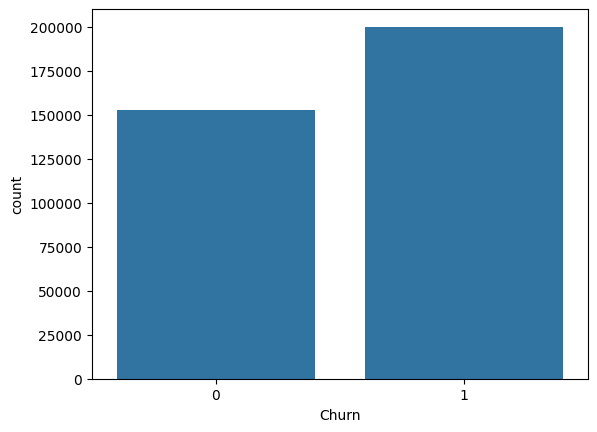

In [28]:
import seaborn as sns

sns.countplot(x=y_train)
print(y_train.value_counts(normalize=True))


Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


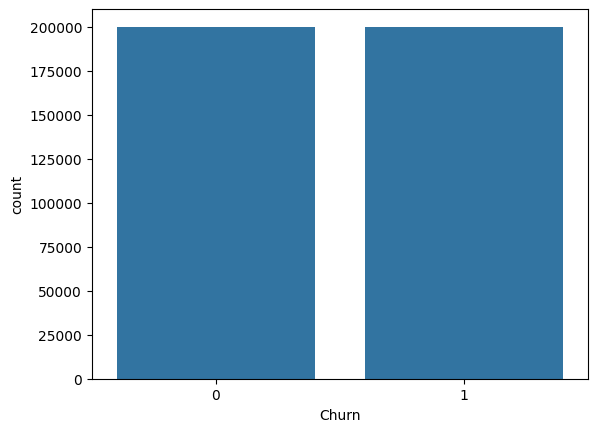

In [29]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train_balanced)
print(y_train_balanced.value_counts(normalize=True))


In [26]:
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    print(f"{name}: Accuracy after SMOTE = {acc:.4f}")


KNN: Accuracy after SMOTE = 0.9569
Logistic Regression: Accuracy after SMOTE = 0.8712
Decision Tree: Accuracy after SMOTE = 0.9999
SVC: Accuracy after SMOTE = 0.9807
Random Forest: Accuracy after SMOTE = 0.9999
XGBoost: Accuracy after SMOTE = 0.9998
CatBoost: Accuracy after SMOTE = 0.9999


In [30]:
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(test_data["Churn"], y_test_pred)
    print(f"{name} (Test Set after SMOTE): Accuracy = {test_acc:.4f}")


KNN (Test Set after SMOTE): Accuracy = 0.4737
Logistic Regression (Test Set after SMOTE): Accuracy = 0.5263
Decision Tree (Test Set after SMOTE): Accuracy = 0.4737
SVC (Test Set after SMOTE): Accuracy = 0.4737
Random Forest (Test Set after SMOTE): Accuracy = 0.4737
XGBoost (Test Set after SMOTE): Accuracy = 0.4737
CatBoost (Test Set after SMOTE): Accuracy = 0.4737


In [32]:
print(set(X_train_balanced.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train_balanced.columns))

set()
set()


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = BalancedBaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("BalancedBagging Accuracy:", accuracy_score(y_test, y_pred))


BalancedBagging Accuracy: 0.99981852620595


BalancedBagging (Test Set) Accuracy: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38167
           1       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



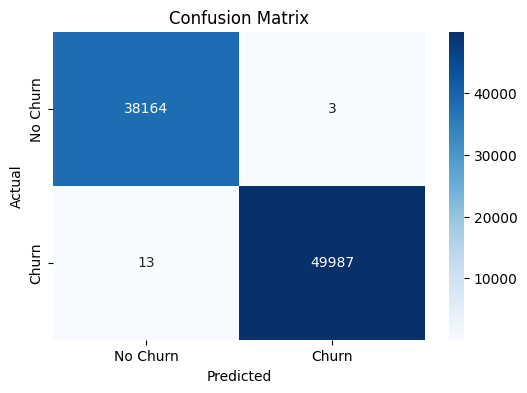

In [38]:
from sklearn.metrics import classification_report, confusion_matrix


y_test_pred = model.predict(X_test)


test_acc = accuracy_score(y_test, y_test_pred)
print(f"BalancedBagging (Test Set) Accuracy: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


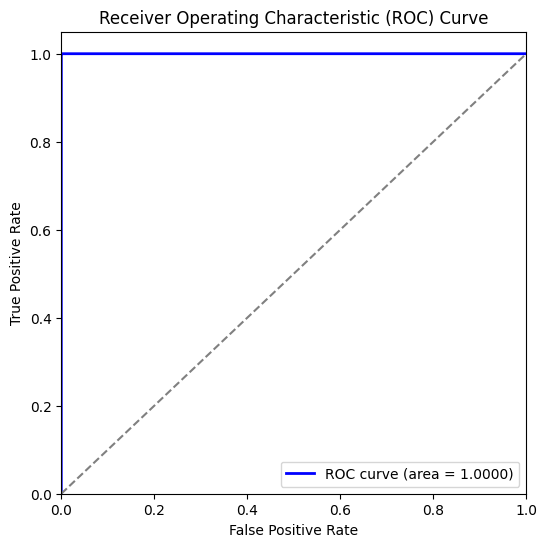

In [43]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
#FPR و TPR
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [44]:
import pandas as pd

print("Training Data Distribution:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nTest Data Distribution:\n", pd.Series(y_test).value_counts(normalize=True))


Training Data Distribution:
 Churn
1    0.567108
0    0.432892
Name: proportion, dtype: float64

Test Data Distribution:
 Churn
1    0.567106
0    0.432894
Name: proportion, dtype: float64


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


y_pred_log = log_reg.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8700534213481235

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     38167
           1       0.90      0.87      0.88     50000

    accuracy                           0.87     88167
   macro avg       0.87      0.87      0.87     88167
weighted avg       0.87      0.87      0.87     88167



In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.99971644 0.99980151 0.99968809 0.99978733 0.99975898]
Mean Accuracy: 0.9997504714105455


In [46]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.994827996869577

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     38167
           1       1.00      0.99      1.00     50000

    accuracy                           0.99     88167
   macro avg       0.99      1.00      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Number of splits
k = 5

# Stratified K-Fold ensures each fold has the same class distribution as the dataset
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Display results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99967391 0.99980151 0.99964556 0.99975898 0.99985822]
Mean Accuracy: 0.9997476358583924


In [49]:
feature_names = X_train.columns


In [52]:
print("Feature Importance Values:", feature_importance)


Feature Importance Values: [1.35028471e-01 2.99253743e-02 3.35475719e-03 1.14132811e-03
 3.17971843e-01 1.24954098e-01 2.19444414e-04 1.44898290e-01
 2.15143444e-01 2.73629506e-02]


In [56]:
sorted_importance = np.log1p(sorted_importance)

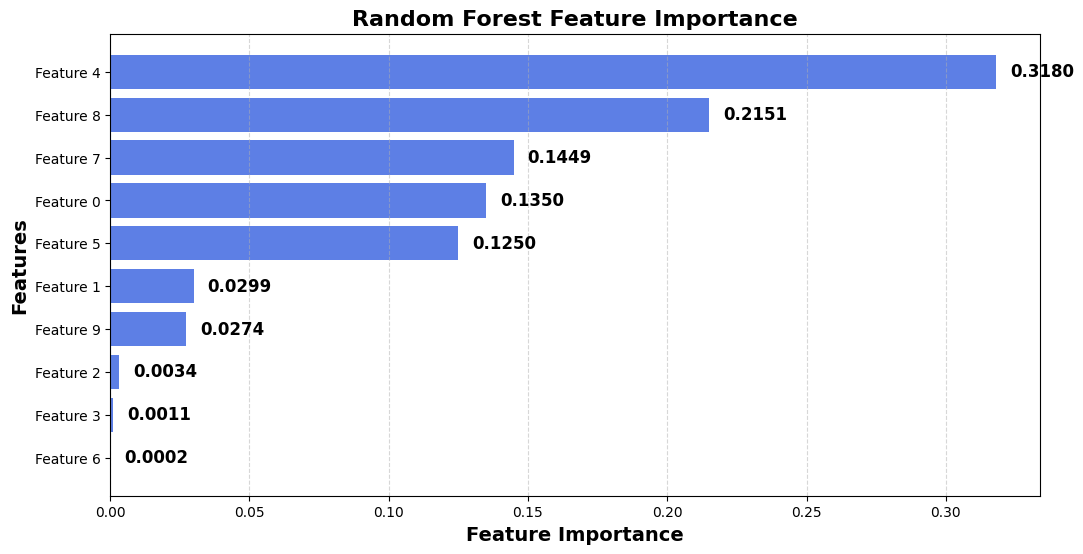

In [57]:
import matplotlib.pyplot as plt
import numpy as np

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importance = feature_importance[sorted_idx]


plt.figure(figsize=(12, 6))
bars = plt.barh(sorted_features, sorted_importance, color="royalblue", alpha=0.85)


plt.xlabel("Feature Importance", fontsize=14, fontweight="bold")
plt.ylabel("Features", fontsize=14, fontweight="bold")
plt.title("Random Forest Feature Importance", fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)


for bar, value in zip(bars, sorted_importance):
    plt.text(value + 0.005, bar.get_y() + bar.get_height()/2, f"{value:.4f}",
             va='center', fontsize=12, fontweight="bold", color="black")

plt.gca().invert_yaxis()
plt.show()


In [58]:
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]


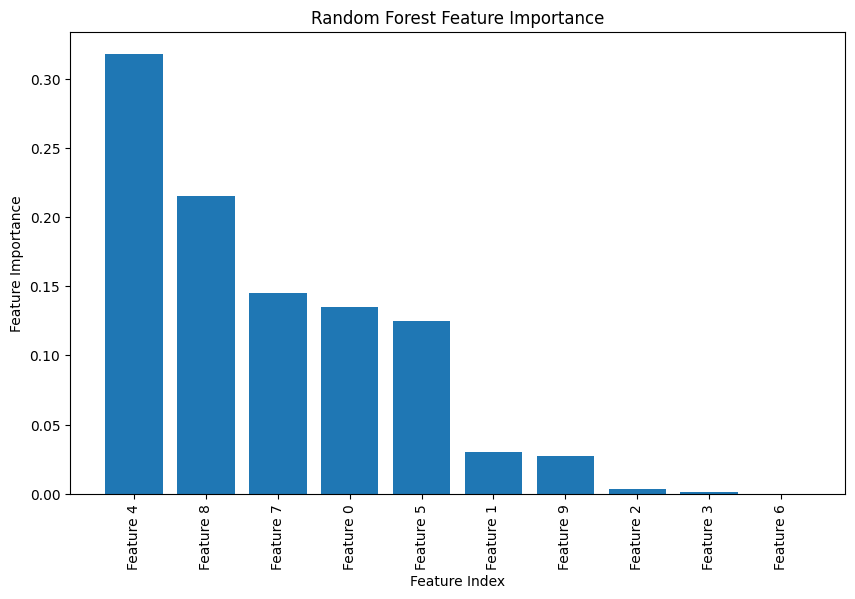

In [59]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [60]:
import joblib


joblib.dump(model, "customer_churn_model.pkl")


# model = joblib.load("customer_churn_model.pkl")


['customer_churn_model.pkl']

In [61]:
!apt-get install git
!git --version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
git version 2.34.1


In [78]:
from google.colab import files
files.download("customer_churn_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>